In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# train 데이터 프레임과 동일한 열(column)을 test 데이터 프레임에서 선택
#test_df = test_df[train_df.columns[:-1]]

# 데이터 프레임 출력
print(test.head())

# 데이터 프레임 정보 출력
print(test.info())

# 데이터 프레임 요약 통계 정보 출력
print(test.describe())

   index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            9.0              0.31         0.48             6.6   
1      1           13.3              0.43         0.58             1.9   
2      2            6.5              0.28         0.27             5.2   
3      3            7.2              0.15         0.39             1.8   
4      4            6.8              0.26         0.26             2.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.043                 11.0                  73.0  0.99380  2.90   
1      0.070                 15.0                  40.0  1.00040  3.06   
2      0.040                 44.0                 179.0  0.99480  3.19   
3      0.043                 21.0                 159.0  0.99480  3.52   
4      0.019                 23.5                  72.0  0.99041  3.16   

   sulphates  alcohol   type  
0       0.38     11.6  white  
1       0.49      9.0    red  
2       0.69     

In [4]:
# 데이터 프레임 출력
print(train.head())

# 데이터 프레임 정보 출력
print(train.info())

# 데이터 프레임 요약 통계 정보 출력
print(train.describe())

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.991

In [5]:
# 과제에서 제외하는 항목인 index, quality 컬럼 삭제
train.drop(['index', 'quality'], axis=1, inplace=True)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\908130838.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정


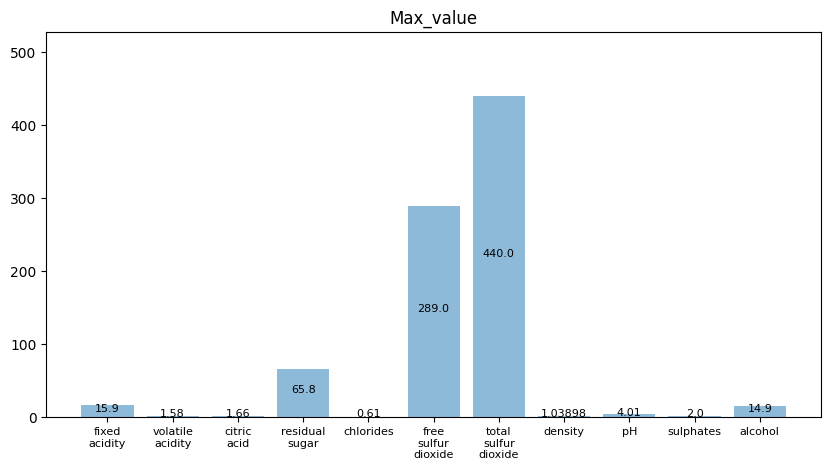

In [6]:
# column 별로 max 값 막대그래프로 표현

max_values = train.select_dtypes(include='number').max()        # 최대값을 찾기 위해 select_dtypes함수를 사용하여 number형 데이터만 include
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=max_values.index, height=max_values.values, align='center', alpha=0.5)
ax.set_ylim([0, max_values.max()*1.2])  # y축 범위 조정
for i, v in enumerate(max_values.values):
    ax.text(i, v/2, str(v), ha='center', fontsize=8)  # 텍스트 위치 조정 및 fontsize 수정
xticklabels = [label.replace(' ', '\n') for label in max_values.index]  # 공백을 엔터키로 대체한 리스트 생성
ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정
ax.set_title("Max_value")
plt.show()

C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\2598579262.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정


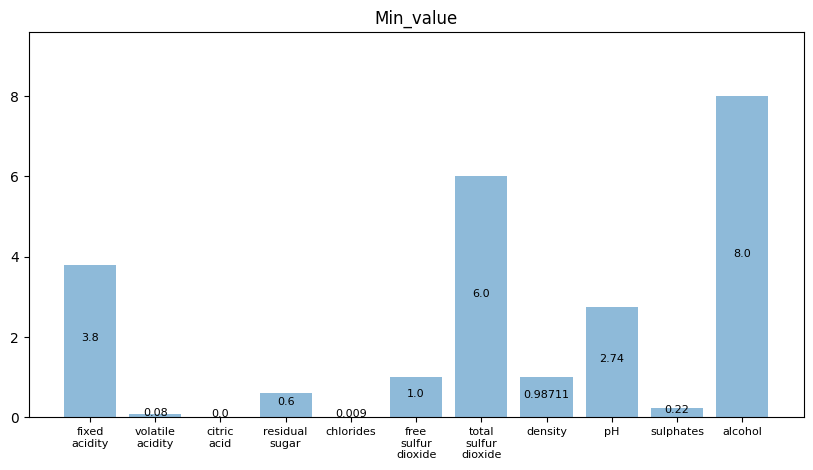

In [7]:
# column 별로 min 값 막대그래프로 표현

min_values = train.select_dtypes(include='number').min()        # 최대값을 찾기 위해 select_dtypes함수를 사용하여 number형 데이터만 include
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=min_values.index, height=min_values.values, align='center', alpha=0.5)
ax.set_ylim([0, min_values.max()*1.2])  # y축 범위 조정
for i, v in enumerate(min_values.values):
    ax.text(i, v/2, str(v), ha='center', fontsize=8)  # 텍스트 위치 조정 및 fontsize 수정
xticklabels = [label.replace(' ', '\n') for label in min_values.index]  # 공백을 엔터키로 대체한 리스트 생성
ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정
ax.set_title("Min_value")
plt.show()

C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\2594591238.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정


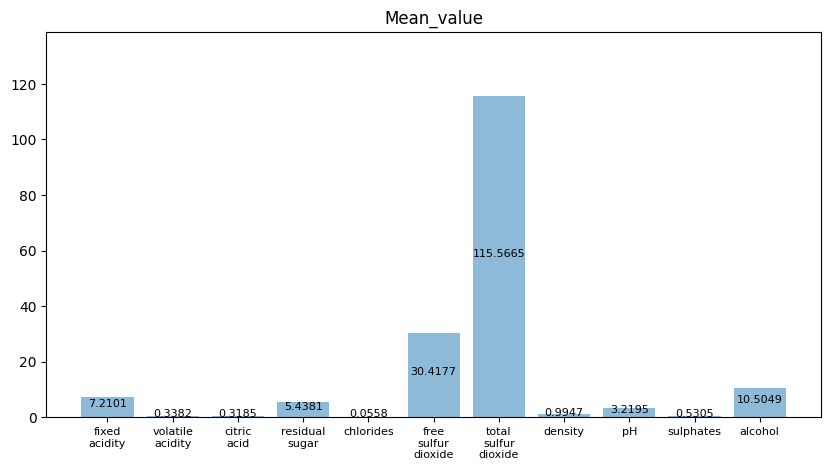

In [8]:
# column 별로 mean 값 막대그래프로 표현

mean_values = train.select_dtypes(include='number').mean()        # 평균값을 찾기 위해 select_dtypes함수를 사용하여 number형 데이터만 include
mean_values = mean_values.round(4)  # 소수점 이하 자리가 많아 텍스트가 겹치는 문제 수정을 위해 4자리까지 반올림
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=mean_values.index, height=mean_values.values, align='center', alpha=0.5)
ax.set_ylim([0, mean_values.max()*1.2])  # y축 범위 조정
for i, v in enumerate(mean_values.values):
    ax.text(i, v/2, str(v), ha='center', fontsize=8)  # 텍스트 위치 조정 및 fontsize 수정
xticklabels = [label.replace(' ', '\n') for label in mean_values.index]  # 공백을 엔터키로 대체한 리스트 생성
ax.set_xticklabels(xticklabels, fontsize=8)  # xticklabel 폰트 크기 및 rotation 수정
ax.set_title("Mean_value")
plt.show()

C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\1299244173.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train.corr(), annot=True)    # 컬럼의 상관계수를 히트맵으로 시각화하고 각 셀에 상관계수 값을 표시


<Axes: >

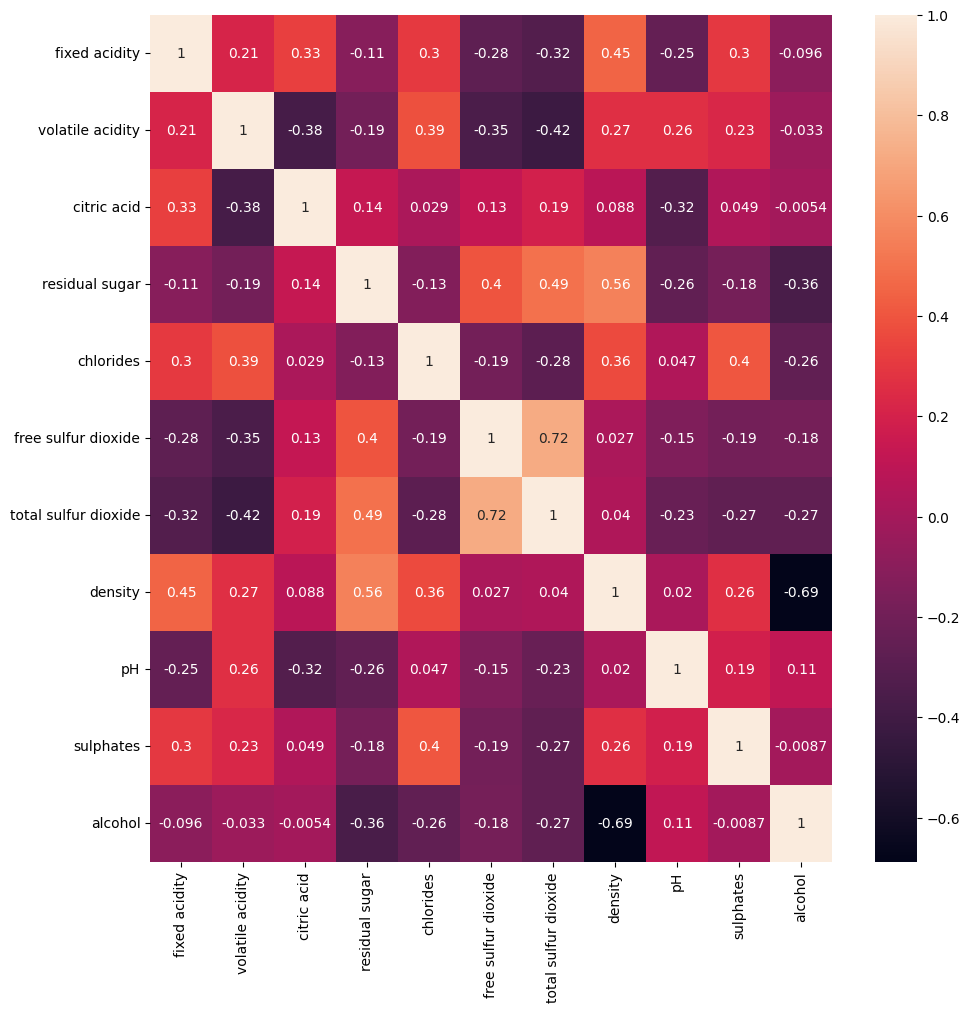

In [9]:
# 변수간 상관관계(피어슨 상관계수)
# 피어슨 상관계수란 변수 간 선형적 관계의 강도와 방향성을 나타내는 값으로
# -1과 1 사이의 값을 가지며 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계가 강하다.
# 0에 가까울수록 두 변수 간 선형적인 상관관계가 거의 없다는 것을 의미한다.

plt.figure(figsize=(11,11))
sns.heatmap(data = train.corr(), annot=True)    # 컬럼의 상관계수를 히트맵으로 시각화하고 각 셀에 상관계수 값을 표시

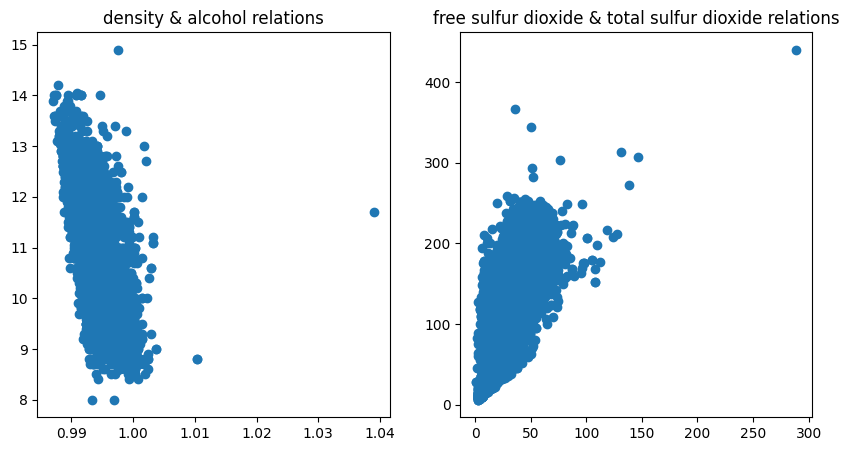

In [10]:
# 상관관계를 체크하기 위한 몇가지 컬럼별 그래프
# 음/양의 상관계수가 가장 높은 두가지 case를 찾아 그래프로 출력

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(train['density'], train['alcohol'])
axes[0].set_title('density & alcohol relations')
axes[1].scatter(train['free sulfur dioxide'], train['total sulfur dioxide'])
axes[1].set_title('free sulfur dioxide & total sulfur dioxide relations')
plt.show()

C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\3890938939.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col])
C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\3890938939.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col])
C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\

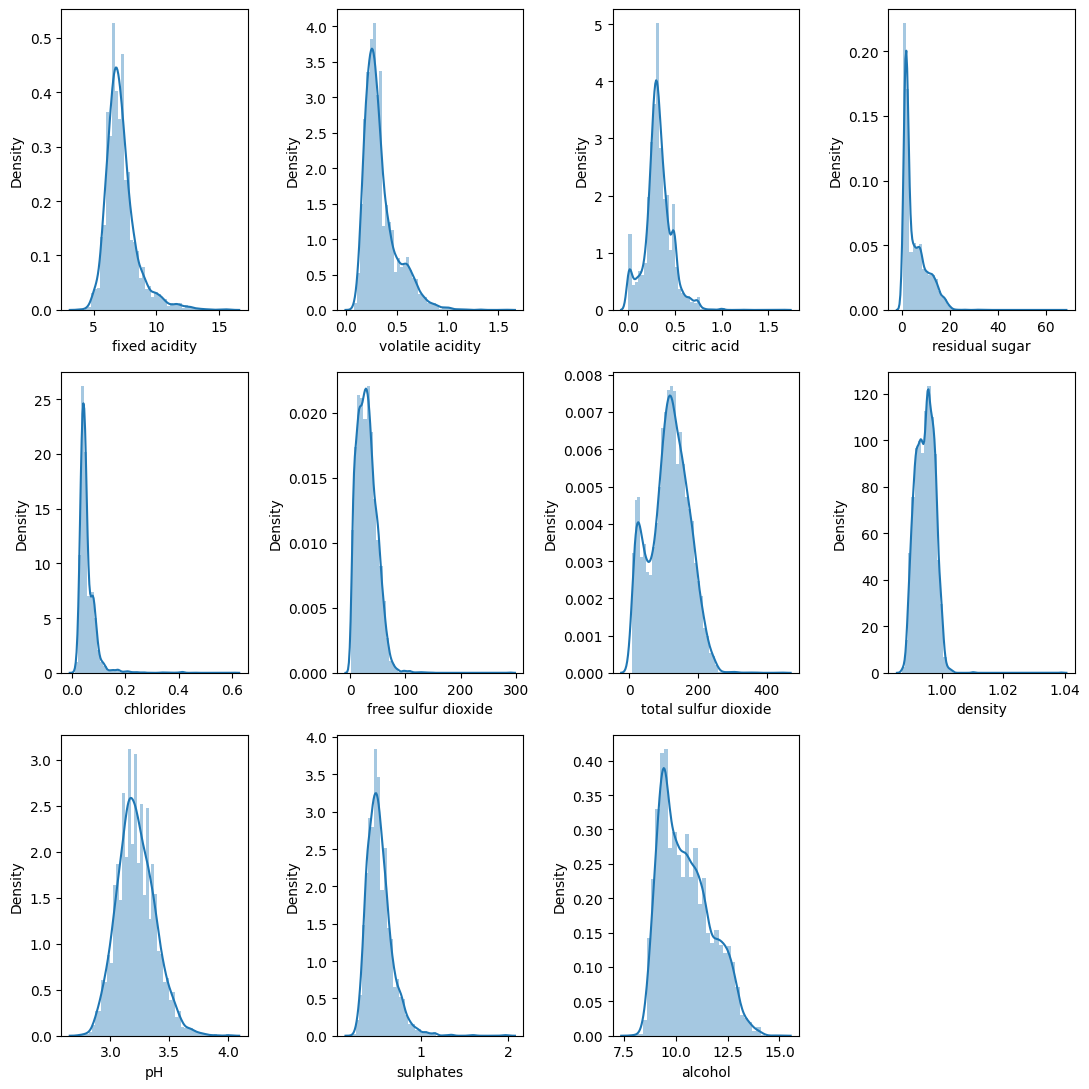

In [11]:
#plt.hist(train['fixed acidity'], bins=20)
# train.hist(figsize=(10,10))
# plt.show()

# 여기서 y축의 Density는 train.csv의 density컬럼이 아닌 히스토그램의 특징인 y축이 밀도 함수(density function)값을 나타내는 것이다.

plt.figure(figsize=(11,11))
num_cols = train.select_dtypes(exclude=['object']).columns
for i, col in enumerate(num_cols):
    plt.subplot(3,4,i+1)
    sns.distplot(train[col])
plt.tight_layout()
plt.show()

In [12]:
# 와인 성분을 가지고 와인의 type을 분류하기 위해 red/white와인의 와인 성분 분포 정도 확인
# 각 type당 성분의 최대, 최소, 평균값을 측정하여 표로 출력
stats = ['max', 'min', 'mean']
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
result = train.groupby('type')[column_names].agg(stats)

# 테이블 생성
result_table = result.style.set_caption("Wine Quality by Type and Attribute").\
    set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center')]}]).\
    set_properties(**{'text-align': 'center', 'color': 'black'}).\
    highlight_max(color='lightgreen').\
    highlight_min(color='#ffcccb').\
    format('{:.2f}')

result_table

C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\814349140.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train["type"]==wine_type, col], label=wine_type)
C:\Users\김남현\AppData\Local\Temp\ipykernel_16108\814349140.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train["

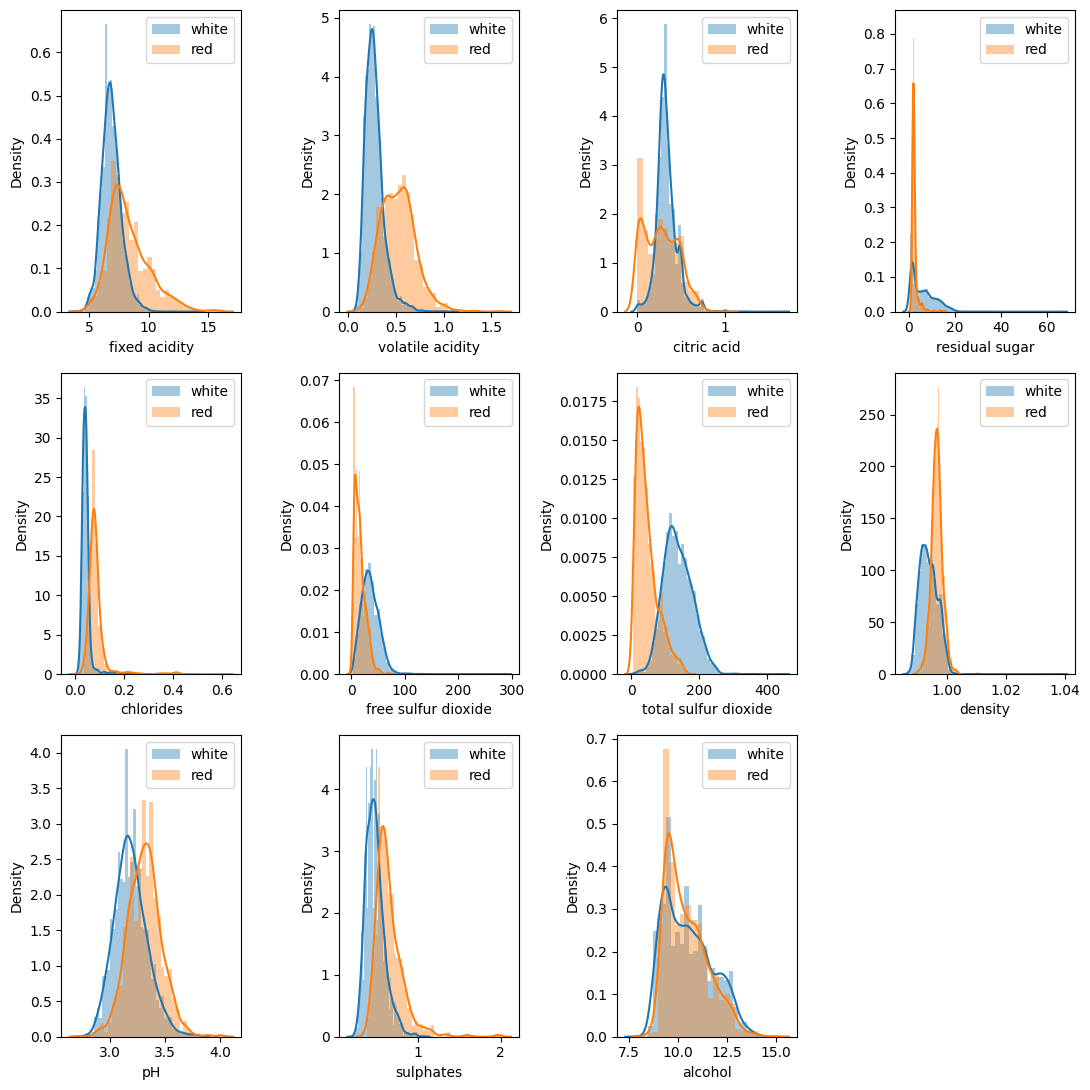

In [15]:
# type별로 나눠서 각 성분별로 차이를 그래프로 표현
plt.figure(figsize=(11,11))
num_cols = train.select_dtypes(exclude=['object']).columns
for i, col in enumerate(num_cols):
    plt.subplot(3,4,i+1)
    for wine_type in train["type"].unique():
        sns.distplot(train.loc[train["type"]==wine_type, col], label=wine_type)
    plt.legend()
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

ss= StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])

#factorize
train['type'] = pd.factorize(train['type'])[0]

train.head(3)